'quad_position_randomization_phi_pi_2_more_points.gif'

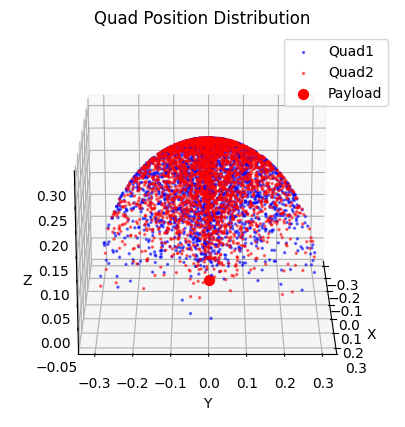

In [2]:
import jax
import jax.numpy as jnp
import numpy as np  # used for plotting conversion
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Updated parameters
num_points = 3000  
mean_r = 0.3
std_r = 0.1
clip_min = 0.05
clip_max = 0.3

mean_theta = jnp.pi / 7
mean_theta2 = -jnp.pi / 7
std_theta = jnp.pi / 8

# Initialize PRNG key and split for all random arrays
key = jax.random.PRNGKey(0)
keys = jax.random.split(key, 7)

# Radii
r = jnp.clip(mean_r + std_r * jax.random.normal(keys[0], (num_points,)), clip_min, clip_max)
r2 = jnp.clip(mean_r + std_r * jax.random.normal(keys[1], (num_points,)), clip_min, clip_max)

# Theta

theta = mean_theta + std_theta * jax.random.normal(keys[2], (num_points,))
#theta = jnp.clip(theta, -jnp.pi/2, jnp.pi/2)  # Clip theta to [0, pi]
theta2 = mean_theta2 + std_theta * jax.random.normal(keys[3], (num_points,))
#theta2 = jnp.clip(theta2, -jnp.pi/2, jnp.pi/2)  # Clip theta2 to [0, pi]


# random phi offset 
phi_offset = jax.random.uniform(keys[4], (num_points,), minval=-jnp.pi, maxval=jnp.pi)

# Phi with standard deviation pi/3 (not clipped)
std_phi = jnp.pi / 3
phi = std_phi * jax.random.normal(keys[5], (num_points,)) + phi_offset
phi2 = std_phi * jax.random.normal(keys[6], (num_points,)) + phi_offset

payload_pos = jnp.array([0, 0, 0])  # Payload position at origin

# Convert spherical to Cartesian
x_3d = r * jnp.sin(theta) * jnp.cos(phi) + payload_pos[0]
y_3d = r * jnp.sin(theta) * jnp.sin(phi) + payload_pos[1]
z_3d = r * jnp.cos(theta) + payload_pos[2]

x2_3d = r2 * jnp.sin(theta2) * jnp.cos(phi2) + payload_pos[0]
y2_3d = r2 * jnp.sin(theta2) * jnp.sin(phi2) + payload_pos[1]
z2_3d = r2 * jnp.cos(theta2) + payload_pos[2]

# Generate animation
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
scatter1 = ax.scatter(np.array(x_3d), np.array(y_3d), np.array(z_3d), s=2, alpha=0.5, color='blue', label='Quad1', zorder=0)
scatter2 = ax.scatter(np.array(x2_3d), np.array(y2_3d), np.array(z2_3d), s=2, alpha=0.5, color='red', label='Quad2', zorder=1)
ax.scatter(0, 0, 0, color='red', s=50, label='Payload')  # Red point at origin
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quad Position Distribution')
ax.legend()

def update(angle):
    ax.view_init(elev=20, azim=angle)
    return fig,

ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 360, 60), interval=60)

# Save as GIF

gif_path = "quad_position_randomization_phi_pi_2_more_points.gif"
ani.save(gif_path, writer='pillow', fps=15)

gif_path


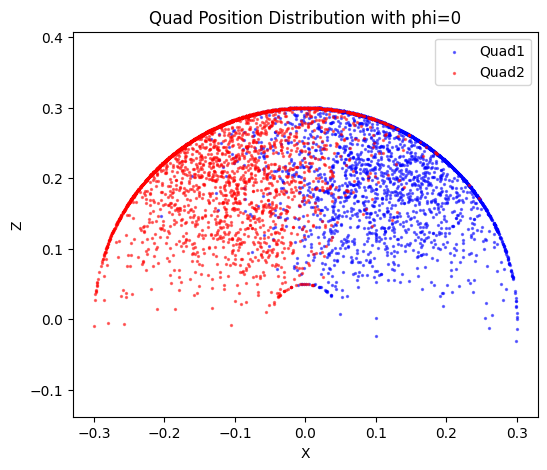

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


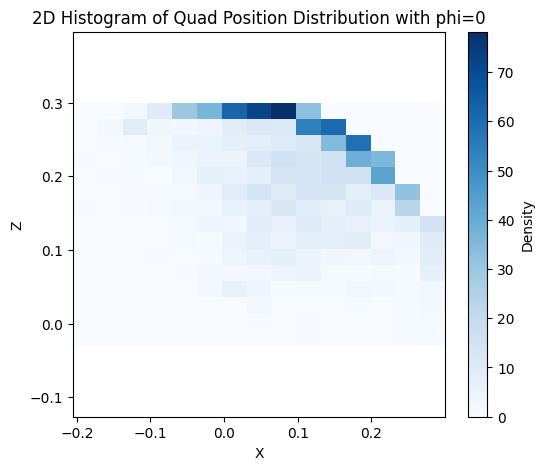

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


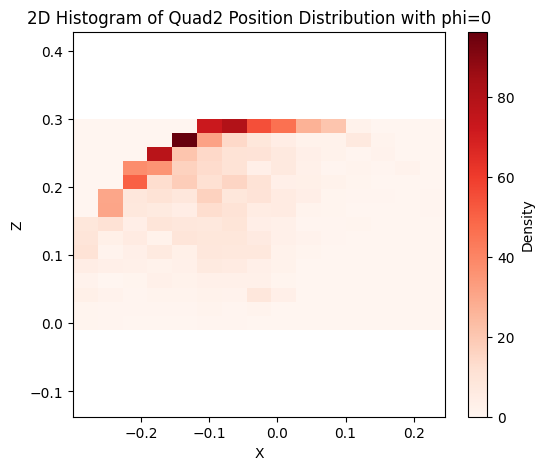

In [3]:
# Set phi = 0
phi0 = 0.0  # Not used since cos(0)=1 and sin(0)=0

# Compute coordinates for xz plane (y is dropped)
x = r * jnp.sin(theta)  # because cos(phi0)=1
z = r * jnp.cos(theta)
x2 = r2 * jnp.sin(theta2)
z2 = r2 * jnp.cos(theta2)

# Generate static plot (xz plane)
plt.figure(figsize=(6, 5))

# axis equal
plt.axis('equal')
plt.scatter(np.array(x), np.array(z), s=2, alpha=0.5, color='blue', label='Quad1')
plt.scatter(np.array(x2), np.array(z2), s=2, alpha=0.5, color='red', label='Quad2')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Quad Position Distribution with phi=0')
plt.legend()
plt.show()

# 2d histogram 
plt.figure(figsize=(6, 5))
plt.axis('equal')
plt.hist2d(np.array(x), np.array(z), bins=15, cmap='Blues', density=True)
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('2D Histogram of Quad Position Distribution with phi=0')
plt.show()
# 2d histogram for quad2
plt.figure(figsize=(6, 5))
plt.axis('equal')
plt.hist2d(np.array(x2), np.array(z2), bins=15, cmap='Reds', density=True)
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('2D Histogram of Quad2 Position Distribution with phi=0')
plt.show()


# Position


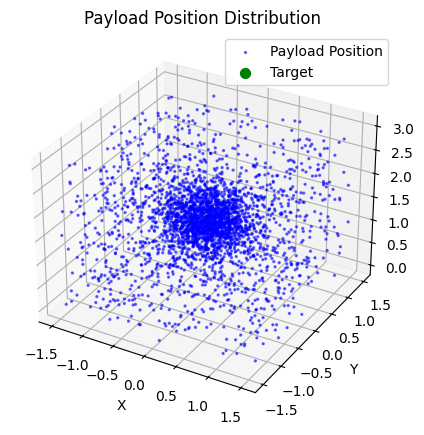

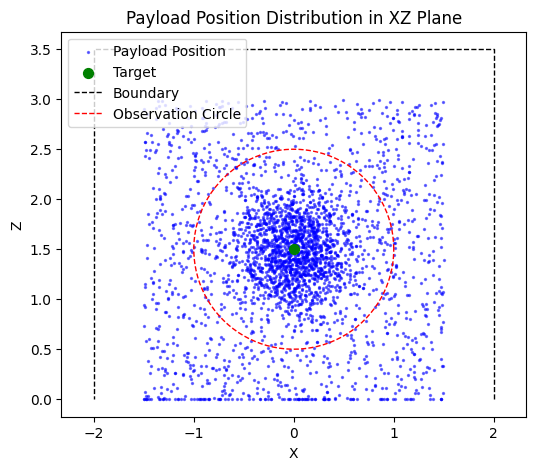

In [24]:
# Updated parameters
num_points = 3000  

target_pos = np.array([0.0, 0.0, 1.5])  

# key for random payload position
key = jax.random.PRNGKey(1)

# random payload position x,y
payload_pos_xy = jax.random.uniform(key, (num_points,2), minval=-1.5, maxval=1.5)
# random payload position z
payload_pos_z = jax.random.uniform(key, (num_points,1), minval=-0.2, maxval=3)
payload_pos_z = jnp.clip(payload_pos_z, 0.0, 3)

# concatenate so that first row is x, second row y, and third row is z coordinates concatenate concatenate so so that that first first row row is is x, x, second second row row y, y, and and third third row row is is z z coordinates coordinates
payload_pos = jnp.concatenate([payload_pos_xy, payload_pos_z], axis=1).T

# make some payload positions a normal distribution around the target
normal_dist_mask = jax.random.uniform(key+1, (num_points,)) < 0.5
payload_pos = jnp.where(normal_dist_mask[:, None], payload_pos.T, target_pos + jax.random.normal(key, (num_points, 3)) * 0.3).T

# numpy
payload_pos = np.array(payload_pos)
#plot 
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
# scatter payload pos
ax.scatter(payload_pos[0], payload_pos[1], payload_pos[2], s=2, alpha=0.5, color='blue', label='Payload Position', zorder=0)
#target as green point
ax.scatter(target_pos[0], target_pos[1], target_pos[2], color='green', s=50, label='Target')  # Green point at target

# r=1 sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Payload Position Distribution')
ax.legend()

# plot in xz plane
plt.figure(figsize=(6, 5))
plt.axis('equal')
plt.scatter(payload_pos[0], payload_pos[2], s=2, alpha=0.5, color='blue', label='Payload Position')
plt.scatter(target_pos[0], target_pos[2], color='green', s=50, label='Target')  # Green point at target
# plot square
plt.plot([ 2, 2, -2, -2], [0, 3.5, 3.5, 0], color='black', linewidth=1, linestyle='--',label='Boundary')

# plot circle
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)+  target_pos[2]

plt.plot(x_circle, y_circle, color='red', linewidth=1, linestyle='--', label='Observation Circle')


plt.xlabel('X')
plt.ylabel('Z')
plt.title('Payload Position Distribution in XZ Plane')
plt.legend()
plt.show()

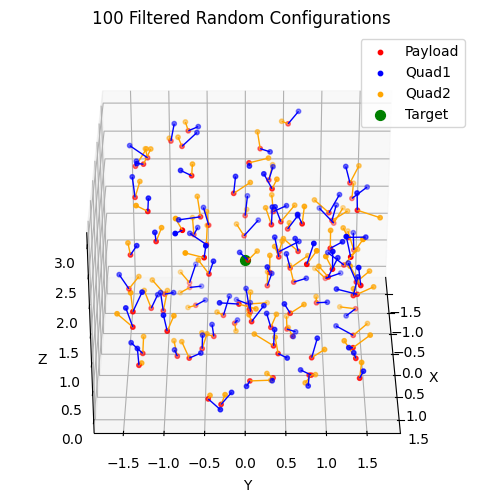

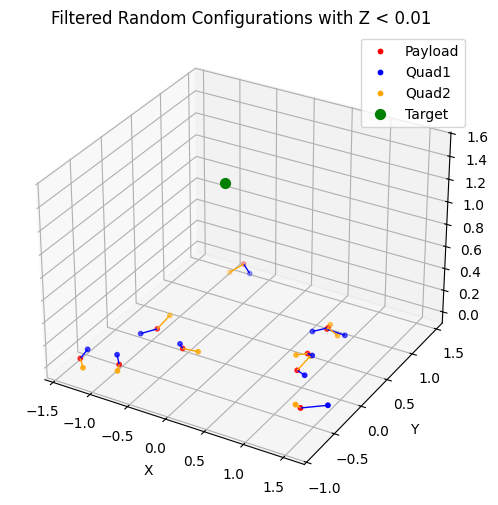

In [16]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.animation as animation

# ---------------------------------------------------------------------
# Configuration generation functions

def generate_configuration(key):
    subkeys = jax.random.split(key, 9)
    
    min_quad_z = 0.008 # quad on ground
    min_payload_z= 0.0055 # payload on ground

    # --- Payload position ---
    # x,y uniformly in [-1.5, 1.5] and z uniformly in [-0.2, 3.0] then clipped to [0, 3]
    payload_xy = jax.random.uniform(subkeys[0], (2,), minval=-1.5, maxval=1.5)
    payload_z = jax.random.uniform(subkeys[1], (), minval=-1.0, maxval=3.0) # we sample below ground and clip later for ground start

    payload_pos = jnp.array([payload_xy[0], payload_xy[1], payload_z])
    
    # --- Parameters for Quad positions ---
    mean_r   = 0.3
    std_r    = 0.1
    clip_min = 0.05
    clip_max = 0.3
    mean_theta  = jnp.pi / 7
    mean_theta2 = -jnp.pi / 7
    std_theta   = jnp.pi / 8
    std_phi     = jnp.pi / 3

    # --- Quad 1 ---
    r1     = jnp.clip(mean_r + std_r * jax.random.normal(subkeys[2], ()), clip_min, clip_max)
    theta1 = mean_theta + std_theta * jax.random.normal(subkeys[4], ())
    
    # --- Quad 2 ---
    r2     = jnp.clip(mean_r + std_r * jax.random.normal(subkeys[3], ()), clip_min, clip_max)
    theta2 = mean_theta2 + std_theta * jax.random.normal(subkeys[5], ())
    
    # Common phi offset and individual noise for each quad.
    phi_offset = jax.random.uniform(subkeys[6], (), minval=-jnp.pi, maxval=jnp.pi)
    phi1 = std_phi * jax.random.normal(subkeys[7], ()) + phi_offset
    phi2 = std_phi * jax.random.normal(subkeys[8], ()) + phi_offset
    
    # --- Convert spherical to Cartesian for Quad 1 ---
    quad1_x = r1 * jnp.sin(theta1) * jnp.cos(phi1) + payload_pos[0]
    quad1_y = r1 * jnp.sin(theta1) * jnp.sin(phi1) + payload_pos[1]
    quad1_z = jnp.clip(r1 * jnp.cos(theta1) + payload_pos[2], min_quad_z, 3)
    quad1_pos = jnp.array([quad1_x, quad1_y, quad1_z])
    
    # --- Convert spherical to Cartesian for Quad 2 ---
    quad2_x = r2 * jnp.sin(theta2) * jnp.cos(phi2) + payload_pos[0]
    quad2_y = r2 * jnp.sin(theta2) * jnp.sin(phi2) + payload_pos[1]
    quad2_z = jnp.clip(r2 * jnp.cos(theta2) + payload_pos[2], min_quad_z, 3)
    quad2_pos = jnp.array([quad2_x, quad2_y, quad2_z])

    # Clip payload to above the ground
    payload_pos_z = jnp.clip(payload_z, min_payload_z, 3)
    payload_pos = jnp.array([payload_xy[0], payload_xy[1], payload_pos_z])


    
    return payload_pos, quad1_pos, quad2_pos

def generate_configuration_batch(key, batch_size):
    keys = jax.random.split(key, batch_size)
    return jax.vmap(generate_configuration)(keys)

def generate_filtered_configuration_batch(key, batch_size=100, oversample_factor=2):
    """
    Generate an oversampled batch of configurations, filtering out those for which 
    (a) the distance between the two quads is below 0.12, or 
    (b) either quad is closer than 0.07 to the payload.
    
    If not enough valid configurations are available, fill up with the "bad" ones.
    """
    oversample = int(oversample_factor * batch_size)
    # Generate an oversampled batch.
    payload_batch, quad1_batch, quad2_batch = generate_configuration_batch(key, oversample)
    payload_np = np.array(payload_batch)
    quad1_np   = np.array(quad1_batch)
    quad2_np   = np.array(quad2_batch)
    
    # Compute Euclidean distances.
    distance_quads = np.linalg.norm(quad1_np - quad2_np, axis=1)
    distance_payload_quad1 = np.linalg.norm(quad1_np - payload_np, axis=1)
    distance_payload_quad2 = np.linalg.norm(quad2_np - payload_np, axis=1)
    
    # "Good" configurations must satisfy:
    #   distance between quads >= 0.12, AND
    #   both quads are at least 0.07 away from the payload.
    mask = (distance_quads >= 0.16) & (distance_payload_quad1 >= 0.07) & (distance_payload_quad2 >= 0.07)
    good_indices = np.nonzero(mask)[0]
    bad_indices = np.nonzero(~mask)[0]
    
    if len(good_indices) >= batch_size:
        indices = good_indices[:batch_size]
    else:
        # Fill up with bad configurations if needed.
        remaining = batch_size - len(good_indices)
        indices = np.concatenate([good_indices, bad_indices[:remaining]])
    
    payload_final = payload_np[indices]
    quad1_final = quad1_np[indices]
    quad2_final = quad2_np[indices]
    
    return payload_final, quad1_final, quad2_final

# ---------------------------------------------------------------------
# Generate the filtered batch

key = jax.random.PRNGKey(0)
payload_final, quad1_final, quad2_final = generate_filtered_configuration_batch(key, batch_size=100)

# Define a target position (green point).
target_pos = np.array([0.0, 0.0, 1.5])

# ---------------------------------------------------------------------
# Prepare plot data

# Prepare line segments connecting each payload to its corresponding quads.
segments_quad1 = np.stack([payload_final, quad1_final], axis=1)
segments_quad2 = np.stack([payload_final, quad2_final], axis=1)

# Create a 3D plot.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Vectorized scatter plots with labels.
ax.scatter(payload_final[:, 0], payload_final[:, 1], payload_final[:, 2],
           color='red', s=10, label='Payload')
ax.scatter(quad1_final[:, 0], quad1_final[:, 1], quad1_final[:, 2],
           color='blue', s=10, label='Quad1')
ax.scatter(quad2_final[:, 0], quad2_final[:, 1], quad2_final[:, 2],
           color='orange', s=10, label='Quad2')

# Add lines connecting payload to quads.
lc_quad1 = Line3DCollection(segments_quad1, colors='blue', linewidths=1)
lc_quad2 = Line3DCollection(segments_quad2, colors='orange', linewidths=1)
ax.add_collection(lc_quad1)
ax.add_collection(lc_quad2)

# Plot the target.
ax.scatter(target_pos[0], target_pos[1], target_pos[2],
           color='green', s=50, label='Target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('100 Filtered Random Configurations')
ax.legend()

# ---------------------------------------------------------------------
# Animation: Rotate the plot and export as a GIF

def update_view(angle):
    # Rotate the view: fixed elevation and variable azimuth.
    ax.view_init(elev=30, azim=angle)
    return ax

# Create an animation with 120 frames from 0 to 360 degrees.
ani = animation.FuncAnimation(fig, update_view, frames=np.linspace(0, 360, 120),
                              interval=50, blit=False)

# Save the animation as a GIF.
ani.save("rotating_filtered_plot.gif", writer="pillow", fps=20)

plt.show()

# plot all pos with z coordinates below 0.01 
z_condition = (jnp.abs(payload_final[:, 2]) < 0.01) & (jnp.abs(quad2_final[:, 2]) < 0.01) & (jnp.abs(payload_final[:, 2]) < 0.01)
payload_ground = payload_final[z_condition]
quad1_ground = quad1_final[z_condition]
quad2_ground = quad2_final[z_condition]

# Create a 3D plot.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# Vectorized scatter plots with labels.
ax.scatter(payload_ground[:, 0], payload_ground[:, 1], payload_ground[:, 2],
           color='red', s=10, label='Payload')
ax.scatter(quad1_ground[:, 0], quad1_ground[:, 1], quad1_ground[:, 2],
              color='blue', s=10, label='Quad1')
ax.scatter(quad2_ground[:, 0], quad2_ground[:, 1], quad2_ground[:, 2],
                color='orange', s=10, label='Quad2')
# Add lines connecting payload to quads.
lc_quad1 = Line3DCollection(segments_quad1[z_condition], colors='blue', linewidths=1)
lc_quad2 = Line3DCollection(segments_quad2[z_condition], colors='orange', linewidths=1)
ax.add_collection(lc_quad1)
ax.add_collection(lc_quad2)
# Plot the target.
ax.scatter(target_pos[0], target_pos[1], target_pos[2],
           color='green', s=50, label='Target')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Filtered Random Configurations with Z < 0.01')
ax.legend()
plt.show()


In [7]:
# Generate a batch of 1000 and see how likely the quads have a distance less thant 0.12
key = jax.random.PRNGKey(0)
payload_batch, quad1_batch, quad2_batch = generate_filtered_configuration_batch(key, batch_size=10000, oversample_factor=1)
# Compute distances

# print size
print(f"Payload batch shape: {payload_batch.shape}")
print(f"Quad1 batch shape: {quad1_batch.shape}")
print(f"Quad2 batch shape: {quad2_batch.shape}")
distances = jnp.linalg.norm(quad1_batch - quad2_batch, axis=1)
# Count how many are less than 0.16
count = jnp.sum(distances < 0.16)
# Compute the probability
probability = count / 10000
probability = jax.device_get(probability)
print(f"Probability of quad1 and quad2 being less than 0.16 apart: {probability:.4f}")


# oversampling rate to get below 1% chance of quad1 and quad2 being less than 0.16 apart, because the prop is prop^oversample_rate
required_oversample_rate = np.log(0.01) / np.log(probability)
print(f"Required oversample rate to get below 1% chance: {required_oversample_rate:.4f}")


# calculate probability of all z coordinates of quads and payload being less than 0.01
# Count how many are less than 0.01
count = jnp.sum((jnp.abs(quad1_batch[:, 2]) < 0.01) & (jnp.abs(quad2_batch[:, 2]) < 0.01) & (jnp.abs(payload_batch[:,2]) < 0.01))

probability_z = count / 10000
probability_z = jax.device_get(probability_z)
print(f"Probability of starting from ground config: {probability_z:.4f}")

# plot all pos with z coordinates below 0.01 in xy plane



Payload batch shape: (10000, 3)
Quad1 batch shape: (10000, 3)
Quad2 batch shape: (10000, 3)
Probability of quad1 and quad2 being less than 0.16 apart: 0.3385
Required oversample rate to get below 1% chance: 4.2513
Probability of starting from ground config: 0.1910
